In [ ]:
## Importing Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Machine Learning Libaries
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc,roc_auc_score,precision_score
from keras import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM, GRU
from keras.callbacks import CSVLogger
from sklearn.neural_network import MLPClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

# from tensorflow_core.estimator import inputs

In [ ]:
import numpy as np
cm = np.array([[35169, 85],
               [123, 727]])

In [ ]:
fpr=cm[0,1]/(cm[0,1]+cm[0,0])
tpr=cm[1,1]/(cm[1,1]+cm[1,0])

In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Supply chain/DataCoSupplyChainDataset - Copy.csv',header= 0,encoding= 'unicode_escape')

In [ ]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,03/02/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,01/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,01/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,01/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,01/15/2018 11:24,Standard Class


In [ ]:
df.shape

(180519, 53)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
df['order date']= pd.to_datetime(df['order date (DateOrders)'])
df['shipping date']= pd.to_datetime(df['shipping date (DateOrders)'])

In [ ]:
df['order year']=df['order date'].dt.year
df['order month']=df['order date'].dt.month
df['order day']=df['order date'].dt.day
df['order hour']=df['order date'].dt.hour
df['order minute']=df['order date'].dt.minute

df['shipping year']=df['shipping date'].dt.year
df['shipping month']=df['shipping date'].dt.month
df['shipping day']=df['shipping date'].dt.day
df['shipping hour']=df['shipping date'].dt.hour
df['shipping minute']=df['shipping date'].dt.minute

In [ ]:
data=df.loc[:,['Type','Delivery Status','Sales per customer','Days for shipping (real)','Days for shipment (scheduled)','order year','order month','order day','order hour','order minute','Benefit per order','Category Name','Latitude','Longitude',
               'Customer Segment','Customer City','Customer Country','Customer State','Department Name','Market','Order City','Order Country','Order Item Discount','Order Item Product Price','Order Item Quantity','Order Item Total',
               'Order State','Order Region','Product Name','shipping year','shipping month','shipping day','shipping hour','shipping minute','Shipping Mode','Late_delivery_risk','Order Status','Sales','Product Price','Order Profit Per Order','Order Item Discount Rate','Order Item Profit Ratio']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Delivery Status                180519 non-null  object 
 2   Sales per customer             180519 non-null  float64
 3   Days for shipping (real)       180519 non-null  int64  
 4   Days for shipment (scheduled)  180519 non-null  int64  
 5   order year                     180519 non-null  int64  
 6   order month                    180519 non-null  int64  
 7   order day                      180519 non-null  int64  
 8   order hour                     180519 non-null  int64  
 9   order minute                   180519 non-null  int64  
 10  Benefit per order              180519 non-null  float64
 11  Category Name                  180519 non-null  object 
 12  Latitude                      

In [ ]:
for i in data.columns:
    if data[i].dtype=='object':
        print(i,len(data[i].unique()))

Type 4
Delivery Status 4
Category Name 50
Customer Segment 3
Customer City 563
Customer Country 2
Customer State 46
Department Name 11
Market 5
Order City 3597
Order Country 164
Order State 1089
Order Region 23
Product Name 118
Shipping Mode 4
Order Status 9


In [ ]:
data['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [ ]:
data['Order Status'].value_counts()

0    176457
1      4062
Name: Order Status, dtype: int64

In [ ]:
data['Order Status']= [0 if i!='SUSPECTED_FRAUD' else 1 for i in data['Order Status']]
data['Order Status'].unique()

array([0, 1])

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
enc=LabelEncoder()
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=enc.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Delivery Status                180519 non-null  int64  
 2   Sales per customer             180519 non-null  float64
 3   Days for shipping (real)       180519 non-null  int64  
 4   Days for shipment (scheduled)  180519 non-null  int64  
 5   order year                     180519 non-null  int64  
 6   order month                    180519 non-null  int64  
 7   order day                      180519 non-null  int64  
 8   order hour                     180519 non-null  int64  
 9   order minute                   180519 non-null  int64  
 10  Benefit per order              180519 non-null  float64
 11  Category Name                  180519 non-null  int64  
 12  Latitude                      

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(40,25),dpi=700)
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.coolwarm)

plt.figure()
mng = plt.get_current_fig_manager()
mng.full_screen_toggle()
plt.show()

In [ ]:
y=data['Order Status']
x=data.drop(['Order Status'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_train.value_counts()

0    141203
1      3212
Name: Order Status, dtype: int64

In [ ]:
y_test.value_counts()

0    35254
1      850
Name: Order Status, dtype: int64

In [ ]:
scaler = StandardScaler().fit(x_train)
trainX = scaler.transform(x_train)
# summarize transformed data
np.set_printoptions(precision=3)
#print(trainX[0:5,:])

scaler = StandardScaler().fit(x_test)
testX = scaler.transform(x_test)
# summarize transformed data
np.set_printoptions(precision=3)
#print(testT[0:5,:])


y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
X_test = np.reshape(testX, (testX.shape[0], testX.shape[1],1))

In [ ]:
X_train.shape

(144415, 41, 1)

In [ ]:
import numpy as np
cm = np.array([[35169, 85],
               [123, 727]])

In [ ]:
cm

array([[35169,    85],
       [  123,   727]])

In [ ]:
# Assuming y_true and y_pred are your true and predicted labels


# Calculate recall for each class
recall_class_0 = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # Negative class
recall_class_1 = cm[1, 1] / (cm[1, 1] + cm[1, 0])  # Positive class

print("Recall for Class 0:", recall_class_0)
print("Recall for Class 1:", recall_class_1)

Recall for Class 0: 0.9975889260793102
Recall for Class 1: 0.8552941176470589


In [ ]:
import scipy.stats as stats

# Sample data: Replace with your actual model performance scores: overall accuracy and detection rate
model_scores = {
    "model1": [0.9942,0.89],
    "model2": [0.9947,0.81],
    "model3": [0.9921,0.82],
    "model4": [0.9811,0.30],
    "model5": [0.9802,0.20],
    "model6": [0.9881,0.70],
    "model7": [0.1280,0.11],
    "model8": [0.1205,0.10],
    "model9": [0.9764,0.00],
    "model10": [0.9775, 0.19],
    }

# Convert scores to a list of lists
data = [list(model_scores[model]) for model in model_scores]

# Perform the Friedman test
friedman_stat, p_value = stats.friedmanchisquare(*data)

print("Friedman test statistic:", friedman_stat)
print("p-value:", p_value)

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the models.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")

Friedman test statistic: 17.345454545454544
p-value: 0.043573141349510736
Reject the null hypothesis: There is a significant difference between the models.


In [ ]:
stats.friedmanchisquare(*data)

FriedmanchisquareResult(statistic=17.345454545454544, pvalue=0.043573141349510736)

In [ ]:
model = Sequential()
model.add(GRU(32,activation='sigmoid',input_shape=(41,1)))
#model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 32)                3360      
                                                                 
Total params: 3,360
Trainable params: 3,360
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpointer = ModelCheckpoint(filepath="model_supply_rnn.hdf5", verbose=1, save_best_only=True, monitor='val_accuracy',mode='max')
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
h=model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test),callbacks=[checkpointer,csv_logger])

4513/4513 [==============================] - ETA: 0s - loss: 0.1448 - accuracy: 0.1130
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to model_supply_rnn.hdf5
4513/4513 [==============================] - 126s 27ms/step - loss: 0.1448 - accuracy: 0.1130 - val_loss: 0.1112 - val_accuracy: 0.0000e+00


In [ ]:
trainX

array([[ 1.333, -0.172, -0.069, ..., -0.192, -1.019, -0.236],
       [ 0.327,  1.871, -0.613, ...,  0.155,  0.825,  0.491],
       [-0.679, -0.172, -0.44 , ...,  0.126, -1.444,  0.32 ],
       ...,
       [-1.685, -0.172, -0.723, ...,  0.23 , -0.877,  0.769],
       [-0.679, -0.172,  1.773, ...,  0.771, -1.302,  0.298],
       [ 1.333, -0.172, -1.172, ..., -0.063,  0.825,  0.512]])

In [ ]:
x_train

,Type,Delivery Status,Sales per customer,Days for shipping (real),Days for shipment (scheduled),order year,order month,order day,order hour,order minute,...,shipping day,shipping hour,shipping minute,Shipping Mode,Late_delivery_risk,Sales,Product Price,Order Profit Per Order,Order Item Discount Rate,Order Item Profit Ratio
116587,3,1,174.570007,2,1,2015,4,16,16,8,...,18,16,8,0,1,179.970001,59.990002,1.750000,0.03,0.01
36340,2,3,109.190002,2,2,2016,12,11,11,50,...,14,11,50,2,0,129.990005,129.990005,38.220001,0.16,0.35
175763,1,1,129.990005,2,1,2016,4,26,7,12,...,28,7,12,0,1,129.990005,129.990005,35.099998,0.00,0.27
96918,1,1,198.000000,2,1,2017,6,30,15,43,...,7,15,43,0,1,200.000000,50.000000,3.960000,0.01,0.02
71197,3,1,260.959992,2,1,2016,12,18,13,11,...,20,13,11,0,1,299.950012,59.990002,5.220000,0.13,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,3,1,260.959992,6,2,2017,4,23,0,2,...,29,0,2,2,1,299.950012,59.990002,44.360001,0.13,0.17
103694,3,2,197.990005,4,4,2015,8,25,8,46,...,29,8,46,3,0,199.990005,199.990005,32.270000,0.01,0.16
131932,0,1,95.959999,2,1,2016,9,2,16,15,...,2,16,15,0,1,99.959999,49.980000,46.060001,0.04,0.48
146867,1,1,395.980011,3,2,2016,10,27,23,4,...,30,23,4,2,1,399.980011,399.980011,102.949997,0.01,0.26


In [ ]:
from sklearn.decomposition import PCA

# Create an LDA instance and fit it to the training data
pca = PCA(n_components=22)
pca.fit(trainX, y_train)

PCA(n_components=22)

In [ ]:
pca.explained_variance_ratio_

array([0.131, 0.082, 0.067, 0.059, 0.051, 0.049, 0.047, 0.043, 0.04 ,
       0.039, 0.037, 0.035, 0.031, 0.03 , 0.027, 0.025, 0.024, 0.024,
       0.021, 0.018, 0.018, 0.017])

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

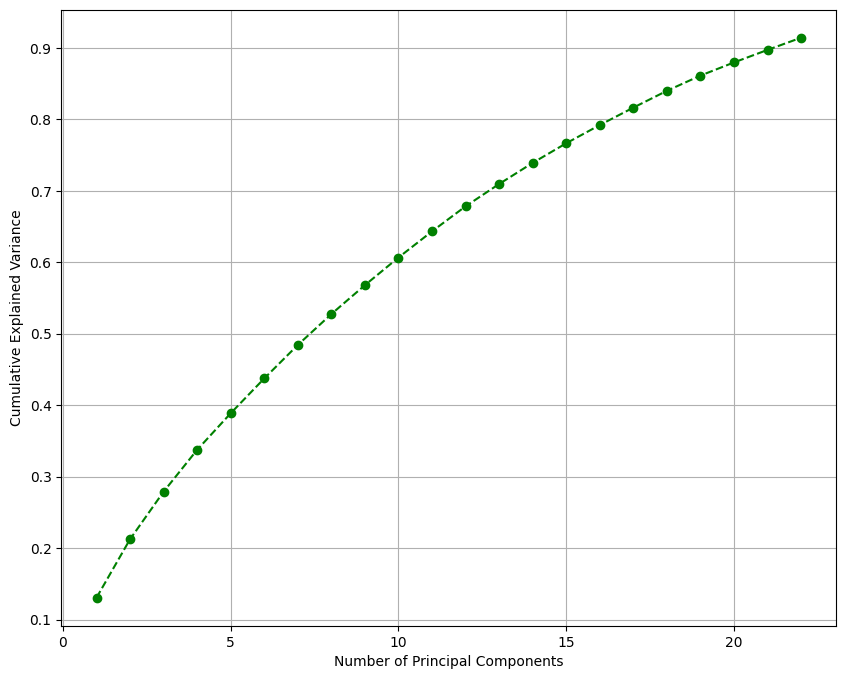

In [ ]:
# Plot the cumulative explained variance
plt.figure(figsize=(10, 8))
plt.plot(range(1, 23), cumulative_variance, marker='o', linestyle='--', color='g')
#plt.title('Cumulative Explained Variance for PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
# Apply PCA to reduce the dimensionality of the data
X_train_reduced = pca.transform(trainX)
X_test_reduced = pca.transform(testX)

In [ ]:
X_train_reduced.shape

(144415, 22)

In [ ]:
y_train.shape

(144415,)

In [ ]:
from keras.regularizers import l1, l2

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu',input_dim=41))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               21504     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 95,489
Trainable params: 95,489
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpointer = ModelCheckpoint(filepath="model_supply_pca.hdf5", verbose=1, save_best_only=True, monitor='val_accuracy',mode='max')
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
h=model.fit(trainX, y_train, epochs=10, batch_size=32, validation_data=(testX, y_test),callbacks=[checkpointer,csv_logger])

Epoch 1/10
4510/4513 [============================>.] - ETA: 0s - loss: 0.1297 - accuracy: 0.9776
Epoch 1: val_accuracy improved from -inf to 0.97646, saving model to model_supply_pca.hdf5
4513/4513 [==============================] - 25s 5ms/step - loss: 0.1296 - accuracy: 0.9776 - val_loss: 0.0729 - val_accuracy: 0.9765
Epoch 2/10
4513/4513 [==============================] - ETA: 0s - loss: 0.0624 - accuracy: 0.9783
Epoch 2: val_accuracy improved from 0.97646 to 0.97903, saving model to model_supply_pca.hdf5
4513/4513 [==============================] - 27s 6ms/step - loss: 0.0624 - accuracy: 0.9783 - val_loss: 0.0563 - val_accuracy: 0.9790
Epoch 3/10
4513/4513 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.9788
Epoch 3: val_accuracy improved from 0.97903 to 0.98033, saving model to model_supply_pca.hdf5
4513/4513 [==============================] - 27s 6ms/step - loss: 0.0523 - accuracy: 0.9788 - val_loss: 0.0490 - val_accuracy: 0.9803
Epoch 4/10
4506/4513 [===

In [ ]:
checkpointer = ModelCheckpoint(filepath="model_supply.hdf5", verbose=1, save_best_only=True, monitor='val_accuracy',mode='max')
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
model.fit(trainX, y_train, epochs=100, batch_size=32, validation_data=(testX, y_test),callbacks=[checkpointer,csv_logger])

In [ ]:
model.load_weights('model_supply.hdf5')

In [ ]:
loss, accuracy = model.evaluate(testX, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

1129/1129 [==============================] - 3s 2ms/step - loss: 0.0468 - accuracy: 0.9942

Loss: 0.05, Accuracy: 99.42%


In [ ]:
y_pred=model.predict(testX)
#y_pred_prob=model.predict_proba(testX)
classes_x=np.argmax(y_pred,axis=1)

1129/1129 [==============================] - 5s 4ms/step


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
#check each classifier accuracy here
clf=rf
clf.fit(trainX,y_train)
y_pred_ml=clf.predict(testX)
acc=accuracy_score(y_test,y_pred_ml)
prc=precision_score(y_test,y_pred_ml, average="weighted")
rc=recall_score(y_test,y_pred_ml, average="weighted")
f1=f1_score(y_test,y_pred_ml, average="weighted")
print(acc,prc,rc,f1)

print(classification_report(y_test,y_pred_ml.round()))

0.9951805894083758 0.9950567662886621 0.9951805894083758 0.995027115109912
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35254
           1       0.95      0.84      0.89       850

    accuracy                           1.00     36104
   macro avg       0.97      0.92      0.94     36104
weighted avg       1.00      1.00      1.00     36104



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc

<ipython-input-51-03b096546844>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


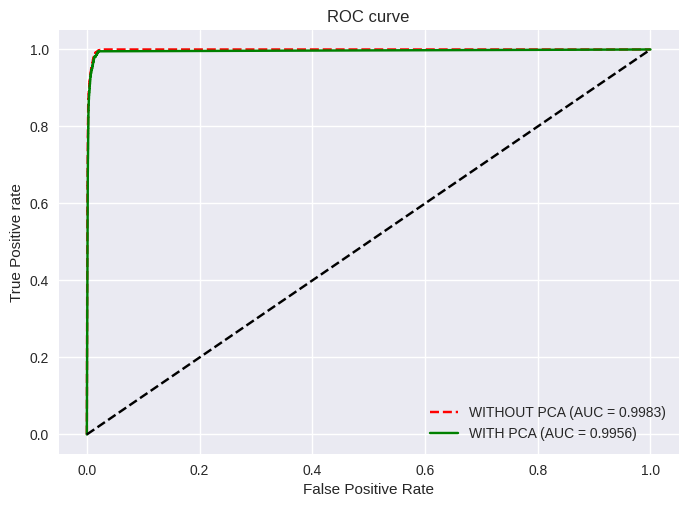

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label=1)
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred1, pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='red',label='WITHOUT PCA (AUC = %0.4f)' % roc_auc_score(y_test, y_pred))
plt.plot(fpr1, tpr1, linestyle='-',color='green', label='WITH PCA (AUC = %0.4f)' % roc_auc_score(y_test, y_pred1))
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

<ipython-input-53-8d13b6ef61c4>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


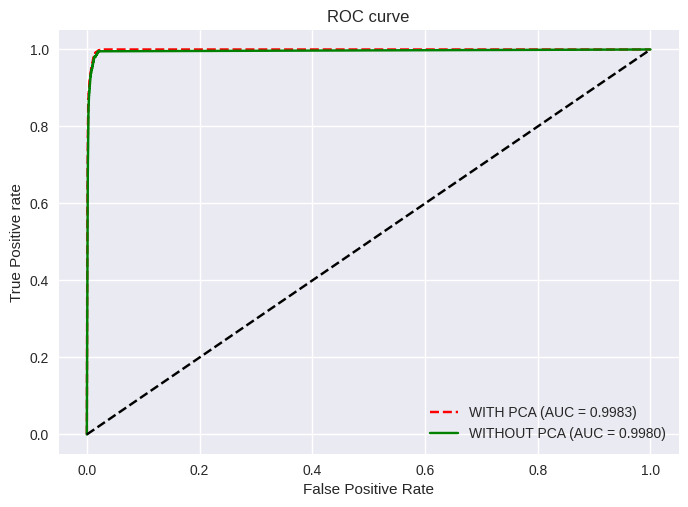

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_pred, pos_label=1)
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred1, pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='red',label='WITH PCA (AUC = 0.9983)' )
plt.plot(fpr1, tpr1, linestyle='-',color='green', label='WITHOUT PCA (AUC = 0.9980)' )
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred.round())
class_arr=['Legitimate','Fraud']
print (cm)

[[35169    85]
 [  123   727]]


In [ ]:
r=recall_score(y_test, y_pred.round())
r

0.8552941176470589

In [ ]:
prc=precision_score(y_test,y_pred.round(), average="weighted")
rc=recall_score(y_test,y_pred.round(), average="weighted")
f1=f1_score(y_test,y_pred.round(), average="weighted")
print(accuracy,prc,rc,f1)

ValueError: ignored

In [ ]:
roc_auc=roc_auc_score(y_test, y_pred)

In [ ]:
roc_auc

0.9264415218631846

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,classes_x.round()))

              precision    recall  f1-score   support

           0       0.99      0.05      0.09     35254
           1       0.00      0.00      0.00       850
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         0
          31       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
model1 = Sequential()

model1.add(Dense(512,activation='relu',input_dim = 22))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               11776     
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 85,761
Trainable params: 85,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import visualkeras

visualkeras.layered_view(model1).show() # display using your system viewer
visualkeras.layered_view(model1, to_file='output.png') # write to disk
visualkeras.layered_view(model1, to_file='output.png').show() # write and show

visualkeras.layered_view(model1)

In [ ]:
checkpointer = ModelCheckpoint(filepath="model_supply_with_pca.hdf5", verbose=1, save_best_only=True, monitor='val_accuracy',mode='max')
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
model1.fit(X_train_reduced, y_train, epochs=100, batch_size=64, validation_data=(X_test_reduced, y_test),callbacks=[checkpointer,csv_logger])

In [ ]:
model1.load_weights('model_supply_PCA.hdf5')

In [ ]:
loss, accuracy = model1.evaluate(X_test_reduced, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

1129/1129 [==============================] - 2s 2ms/step - loss: 0.1348 - accuracy: 0.9935

Loss: 0.13, Accuracy: 99.35%


In [ ]:
y_pred1=model1.predict(X_test_reduced)
cm = metrics.confusion_matrix(y_test, y_pred1.round())
class_arr=['Legitimate','Fraud']
print (cm)

1129/1129 [==============================] - 2s 2ms/step
[[35144   110]
 [  125   725]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35254
           1       0.87      0.85      0.86       850

    accuracy                           0.99     36104
   macro avg       0.93      0.92      0.93     36104
weighted avg       0.99      0.99      0.99     36104



In [ ]:
prc1=precision_score(y_test,y_pred1.round(), average="weighted")
rc1=recall_score(y_test,y_pred1.round(), average="weighted")
f11=f1_score(y_test,y_pred1.round(), average="weighted")
print(accuracy,prc1,rc1,f11)

0.9934910535812378 0.9934377663120435 0.9934910259251053 0.9934627464486305
